In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.formula.api as sm

# Simuloitu data, yksi muuttuja

## 1. Simuloidaan data

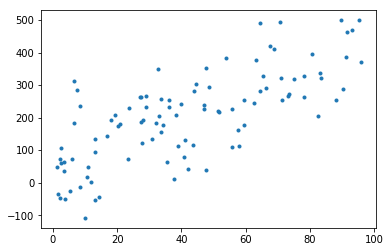

In [9]:
b1 = 4.3
b0 = 12.1

x = 100*np.random.rand(100) # Arvotaan 100 satunnaislukua välillä 0-100
y = b0 + b1*x + 100*np.random.randn(100)
plt.plot(x, y, '.')

plt.show()

## 2. Lasketaan regressiosuoran kertoimet käsin

Kulmakerroin =  4.3  Leikkauspiste =  12.1


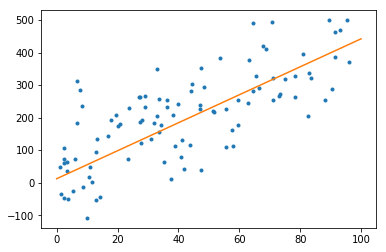

In [10]:
X = np.sum(x)
Y = np.sum(y)
XY = np.sum(x*y)
X2 = np.sum(x**2)
n = np.size(x)

beta1 = (n*XY - X*Y)/(n*X2 - X**2)
beta0 = np.mean(y) - b1*np.mean(x)

xx = np.linspace(0, 100, 1000)
yy = b1*xx + b0
print('Kulmakerroin = ', beta1, ' Leikkauspiste = ', beta0)

plt.figure(2)
plt.plot(x, y, '.')
plt.plot(xx, yy)

plt.show()

Kulmakerroin = 3.7013993306055735  Leikkauspiste = 50.61453647805007


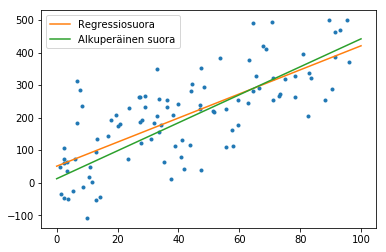

In [11]:
malli = stats.linregress(x, y)
beta0 = malli.intercept
beta1 = malli.slope

print('Kulmakerroin =', beta1, ' Leikkauspiste =', beta0)

xx = np.linspace(0, 100, 1000)
yy = beta0 + beta1*xx

plt.figure(3)
plt.plot(x, y, '.')
plt.plot(xx, yy, label='Regressiosuora')
plt.plot(xx, b0 + b1*xx, label='Alkuperäinen suora')
plt.legend()

plt.show()

# Elinajaodote, yksi muuttuja

## 1. Ladataan data

In [16]:
df = pd.read_excel('Elinajanodote_yksi_muuttuja.xlsx', 
                   names=['Maa', 'Elinajanodote', 'BKT'])
print(df)

              Maa  Elinajanodote    BKT
0       Australia           80.5  36016
1        Brasilia           72.0   5177
2          Egypti           72.3   1432
3           Intia           64.7    769
4         Islanti           80.3  53228
5          Japani           81.3  34955
6           Kiina           72.6   1944
7           Norja           79.5  71674
8           Suomi           78.5  39332
9          Tanska           77.8  50808
10         Turkki           72.6   5202
11         Unkari           72.7  10298
12    Yhdysvallat           77.9  44315
13  Uusi-Seelanti           78.8  24566
14         Venäjä           67.1   6861


## 2. Lasketaan kertoimet käsin

Kulmakerroin =  0.00017612160012329855  Leikkauspiste =  70.70102934594237


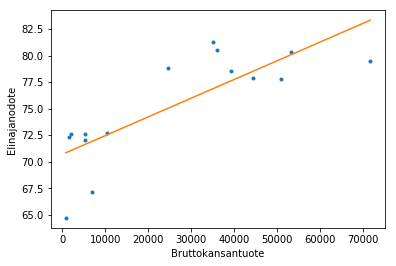

In [22]:
x = df.BKT
y = df.Elinajanodote

X = np.sum(x)
Y = np.sum(y)
XY = np.sum(x*y)
X2 = np.sum(x**2)
n = np.size(x)

beta1 = (n*XY - X*Y)/(n*X2 - X**2)
beta0 = np.mean(y) - beta1*np.mean(x)

plt.figure(5)
plt.plot(x, y, '.')
plt.xlabel('Bruttokansantuote')
plt.ylabel('Elinajanodote')

a = np.min(x)
b = np.max(x)
xx = np.linspace(a, b, 1000)
yy = beta1*xx + beta0
plt.plot(xx, yy)
print('Kulmakerroin = ', beta1, ' Leikkauspiste = ', beta0)



plt.show()

## 3. Lasketaan kertoimet stats.linregress-funktiolla

Tapa 2: Kulmakerroin: 0.00017612160012329793 Vakiotermi: 70.70102934594239


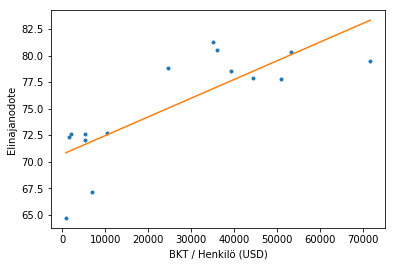

In [23]:
lm = stats.linregress(x, y)

print('Tapa 2: Kulmakerroin:', lm.slope, 'Vakiotermi:', lm.intercept)

plt.plot(x, y, '.')

a = np.min(x)
b = np.max(x)
xx = np.linspace(a, b, 100)

plt.plot(xx, lm.intercept + xx*lm.slope)
plt.xlabel('BKT / Henkilö (USD)')
plt.ylabel('Elinajanodote')
plt.show()

## 4. Käyttäen Statsmodels OLS -funktiota (OLS = Ordinary Least Squares)

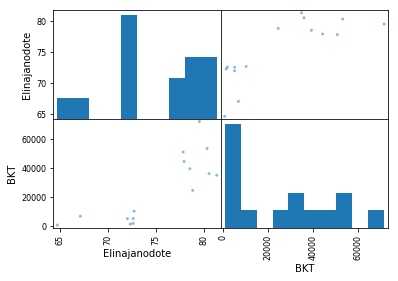

In [24]:
result = sm.ols(formula='Elinajanodote ~ BKT', data=df).fit()

pd.plotting.scatter_matrix(df)
plt.show()

In [25]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          Elinajanodote   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     22.84
Date:                Sun, 30 Sep 2018   Prob (F-statistic):           0.000360
Time:                        20:42:17   Log-Likelihood:                -37.555
No. Observations:                  15   AIC:                             79.11
Df Residuals:                      13   BIC:                             80.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.7010      1.255     56.326      0.0

/Users/mikkopere/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


## 5. Elinajanodote, monta muuttujaa

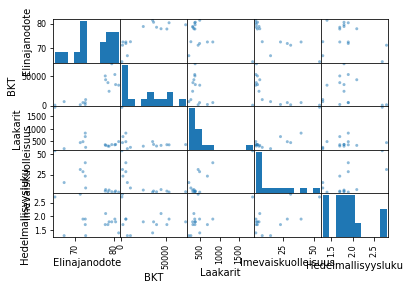

In [26]:
df = pd.read_excel('Elinajanodote.xlsx', 
                   names=['Maa', 'Elinajanodote', 'BKT', 
                          'Laakarit', 'Imevaiskuolleisuus', 
                          'Hedelmallisyysluku'])
pd.plotting.scatter_matrix(df)
plt.show()

In [27]:
result = sm.ols(formula='Elinajanodote ~ BKT + Laakarit + Imevaiskuolleisuus + Hedelmallisyysluku', 
                data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          Elinajanodote   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     8.449
Date:                Sun, 30 Sep 2018   Prob (F-statistic):            0.00302
Time:                        20:43:42   Log-Likelihood:                -34.223
No. Observations:                  15   AIC:                             78.45
Df Residuals:                      10   BIC:                             81.99
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             72.8580      3

/Users/mikkopere/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
